# Introduction to jupyter notebooks and test-driven development

> The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text.
>
> --<cite>http://jupyter.org</cite>

We often use jupyter notebooks for the ongoing analysis of new data, because it is interactive (no need to rerun all scripts when you want to change something along the line) and allows to have code snippets, figures, data, and text in one document. The notebooks are also useful for prototyping.

You can learn more about jupyter notebooks on
* https://youtu.be/-F4WS8o-G2A
* https://youtu.be/o8fmjaW9a0A
* https://youtu.be/kHPEz1wZZWc

In [1]:
# We start by importing the most commonly needed packages, i.e., numpy and matplotlib.pyplot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

/home/mi/schwtony/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/mi/schwtony/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Plotting example

`numpy` and `matplotlib.pyplot` are very useful tools for generation, manipulation, and visualisation of data.

Let's make a plot of the function
$$f(x)=\exp\left(-x^2\right), \quad x \in [-3, 3].$$

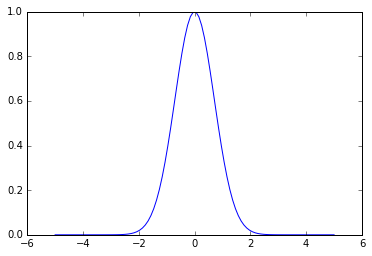

In [12]:
x = np.linspace(-5, 5, 100) # generate 100 x values in the range [-3, 3]
f = np.exp(-x**2) # compute f(x) for all generated x values
plt.plot(x, f) # plot f(x)


## Fancy plotting example

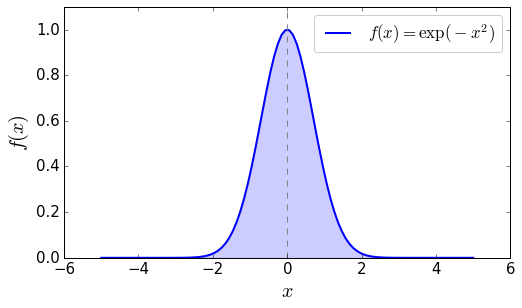

In [13]:
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(x, f, linewidth=2, label=r"$f(x)=\exp(-x^2)$")
ax.plot([0, 0], [0, 1.1], '--', color='grey')
ax.fill_between(x, 0.0, f, alpha=0.2)
ax.set_ylim([0, 1.1])
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$f(x)$", fontsize=20)
ax.tick_params(labelsize=15)
ax.legend(fontsize=17, fancybox=True, framealpha=0.2)

## Test-driven development (TDD)

TDD is a programming style where you
1. define the interface of a function,
2. write some tests before you write code,
3. write the function until all tests are passed, and
4. modify your function to improve efficiency without breaking its functionality and repeat from 2. if you introduce new functionality.

TDD is a lot of work during the development stage, but bug fixing is very easy compared to large projects without unit tests.

**Example:** write a function that computes the sum of all elements in a given list:
$$\texttt{summation}\left([x_0, \dots, x_{n-1}]\right) \rightarrow \sum\limits_{i=0}^{n-1} x_i$$

### First stage: interface

```python
def summation(x):
    pass
```

### Second stage: tests

Ideas for simple tests:
* sum of zeros equals zero
* sum of ones equals number of elements
* sum of $1, \dots, n$ equals $n(n+1)/2$

```python
from nose.tools import assert_true

def test_zeros():
    n = 100
    x = [0] * n
    assert_true(summation(x) == 0)

def test_ones():
    n = 100
    x = [1] * n
    assert_true(summation(x) == n)

def test_range():
    n = 100
    x = [i + 1 for i in range(n)]
    assert_true(summation(x) == (n * (n + 1)) / 2)
```

### Third stage: code

```python
def summation(x):
    result = 0
    for y in x:
        result += y
    return result
```

### Fourth stage: modify

`summation` will throw a `TypeError` if `x` is not a `list` (or any other iterable object). Let's add a feature that, if `x` is a single figure, `summation` returns `x`:

```python
def test_single_value():
    x = np.random.rand()
    assert_true(summation(x) == x)

def summation(x):
    result = 0
    try:
        for y in x:
            result += y
    except TypeError:
        result = x
    return result
```

## Hands-on TDD (optional)

Implement a `logsumexp` summation:
$$\texttt{logsumexp}([x_0, \dots, x_{n-1}]) \rightarrow -\ln\left(\sum_{i=0}^{n-1} \exp\left(-x_i\right)\right)$$

In [ ]:
def logsumexp(x):
    pass

from nose.tools import assert_true

def test_zeros():
    n = 100
    x = [0] * n
    assert_true(logsumexp(x) == )